# Sensor Data Fusion 
Lecturer: Prof. Baum \
Tutor: Dr. Kolja Thormann, M.Sc. Simon Steuernagel\
Semester: Summer 2023

## Homework 5

Consider a $1$D state $x$ and estimates $x_1$ and $x_2$. The errors of the estimates are correlated with $\begin{bmatrix}e_1\\e_2\end{bmatrix}\sim\mathcal{N}(\begin{bmatrix}0\\0\end{bmatrix}, \begin{bmatrix}1 & 0.8\sqrt{1\cdot4}\\0.8\sqrt{1\cdot4} & 4\end{bmatrix})$.

---
The following tasks will have missing sections marked that you should fill out. 

Missing code parts are marked by
```
# ... code code code
=== YOUR CODE HERE ===

=== END OF YOUR CODE ===
# ... code code code
```
If you are asked to implement a function, make sure to check what variable will be returned by the function and to fill it accordingly. Do not change code outside of the indicated sections.

Furthermore, some questions require theoretical answers instead of python code.

Such questions will have a field marked like this: 

=== YOUR ANSWER HERE === 

---
### a)

Write a function which visualizes the joint covariance matrix. Use it to draw the matrix along with the column space in the measurement space. Then assume the correlation coefficient $0.8$ from the description is unknown and define a covariance which ignores it. Draw that covariance and calculate and visualize the solution of the BLUE estimator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def draw_covariance(mean, cov, ax, color):
    """
    Function that draws a covariance matrix as an ellipse.
    
    :param mean:  Center of the ellipse
    :param cov:   Covariance matrix
    :param ax:    Axis on which to plot
    :param color: Color in which to plot the ellipse
    """
    
    # === YOUR CODE HERE ===
    eig_vals, eig_vecs = np.linalg.eig(cov)
    psi = np.arctan2(eig_vecs[1, 0], eig_vecs[0, 0])
    ell = Ellipse(mean, 2.0*np.sqrt(eig_vals[0]), 2.0*np.sqrt(eig_vals[1]), np.rad2deg(psi), fill=False, color=color)
    ax.add_artist(ell)
    
    # === END OF YOUR CODE ===

/tmp/ipykernel_82/338479653.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = Ellipse(mean, 2.0*np.sqrt(eig_vals[0]), 2.0*np.sqrt(eig_vals[1]), np.rad2deg(psi), fill=False, color=color)


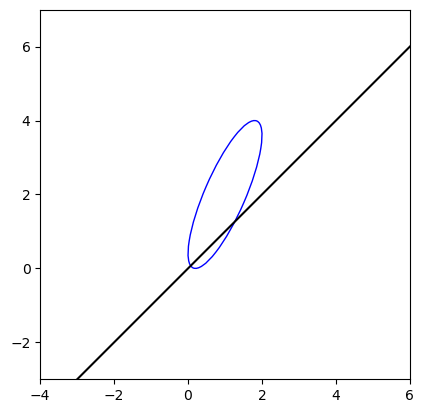

In [2]:
x1 = 1.0
x2 = 2.0

var_x1 = 1.0
var_x2 = 4.0
corr_coef = 0.8
var_x12 = corr_coef*2.0
cov_x12 = np.array([
    [var_x1, var_x12],
    [var_x12, var_x2]
])

fig, ax = plt.subplots(1, 1)
draw_covariance(np.array([x1, x2]), cov_x12, ax, 'blue')
plt.plot([-10.0, 10.0],[-10.0, 10.0], color='black')
plt.axis([x1-5.0, x1+5.0, x2-5.0, x2+5.0])
ax.set_aspect('equal')
plt.show()

/tmp/ipykernel_82/338479653.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = Ellipse(mean, 2.0*np.sqrt(eig_vals[0]), 2.0*np.sqrt(eig_vals[1]), np.rad2deg(psi), fill=False, color=color)


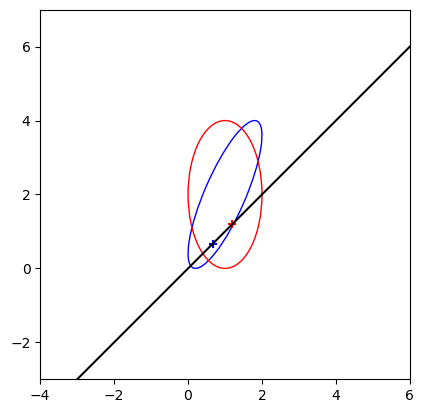

In [3]:
cov_x12_naive = np.array([
    [1.0, 0.0],
    [0.0, 4.0],
])
W = np.linalg.inv(cov_x12_naive)
x_ls_naive = np.ones(2) @ W @ np.array([x1, x2]) / (np.ones(2) @ W @ np.ones(2))

W_true = np.linalg.inv(cov_x12)
x_ls_true = np.ones(2) @ W_true @ np.array([x1, x2]) / (np.ones(2) @ W_true @ np.ones(2))

fig, ax = plt.subplots(1, 1)
draw_covariance(np.array([x1, x2]), cov_x12, ax, 'blue')
draw_covariance(np.array([x1, x2]), cov_x12_naive, ax, 'red')
plt.plot([-10.0, 10.0],[-10.0, 10.0], color='black')
ax.scatter(x_ls_naive, x_ls_naive, marker='+', c='red')
ax.scatter(x_ls_true, x_ls_true, marker='+', c='blue')
plt.axis([x1-5.0, x1+5.0, x2-5.0, x2+5.0])
ax.set_aspect('equal')
plt.show()

---
### b)

Now write a function which calculates a matrix which is bigger than the input matrix, determined by a parameter alpha as in the lecture. Calculate the BLUE estimate for different alpha values and determine which works best. Visualize the results.

In [4]:
def enclosing_ellipse(alpha, cov_x12):
    """
    Function that finds an enclosing ellipse based on a parameter alpha.
    
    The function should return a 2x2 symmetric positive-definite matrix. 
    :param alpha:          Parameter for determining enclosing matrix
    :param cov_x12:        Covariance matrix
    :return: cov_x12_new - Enclosing covariance matrix cov_x12_new > cov_x12
    """
    
    # === YOUR CODE HERE ===
    cov_x12_new = np.array([
        [cov_x12[0, 0] / (0.5 - alpha), 0.0],
        [0.0, cov_x12[1, 1] / (0.5 + alpha)],
    ])
    
    return cov_x12_new    
    # === END OF YOUR CODE ===

/tmp/ipykernel_82/338479653.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = Ellipse(mean, 2.0*np.sqrt(eig_vals[0]), 2.0*np.sqrt(eig_vals[1]), np.rad2deg(psi), fill=False, color=color)


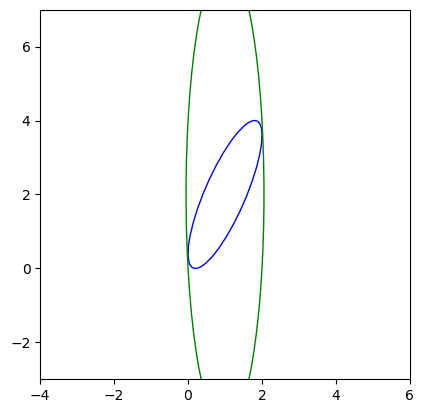

In [10]:
alpha = -0.4
cov_x12_approx = enclosing_ellipse(alpha, cov_x12)

fig, ax = plt.subplots(1, 1)
draw_covariance(np.array([x1, x2]), cov_x12, ax, 'blue')
draw_covariance(np.array([x1, x2]), cov_x12_approx, ax, 'green')
plt.axis([x1-5.0, x1+5.0, x2-5.0, x2+5.0])
ax.set_aspect('equal')
plt.show()

/tmp/ipykernel_82/338479653.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = Ellipse(mean, 2.0*np.sqrt(eig_vals[0]), 2.0*np.sqrt(eig_vals[1]), np.rad2deg(psi), fill=False, color=color)


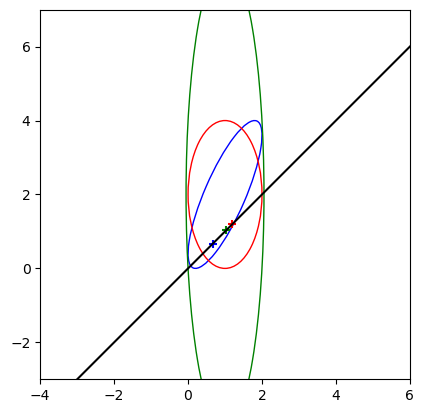

1.2
0.6666666666666665
1.027027027027027


In [11]:
W_approx = np.linalg.inv(cov_x12_approx)
x_ls_approx = np.ones(2) @ W_approx @ np.array([x1, x2]) / (np.ones(2) @ W_approx @ np.ones(2))

fig, ax = plt.subplots(1, 1)
draw_covariance(np.array([x1, x2]), cov_x12, ax, 'blue')
draw_covariance(np.array([x1, x2]), cov_x12_naive, ax, 'red')
draw_covariance(np.array([x1, x2]), cov_x12_approx, ax, 'green')
plt.plot([-10.0, 10.0],[-10.0, 10.0], color='black')
ax.scatter(x_ls_naive, x_ls_naive, marker='+', c='red')
ax.scatter(x_ls_true, x_ls_true, marker='+', c='blue')
ax.scatter(x_ls_approx, x_ls_approx, marker='+', c='green')
plt.axis([x1-5.0, x1+5.0, x2-5.0, x2+5.0])
ax.set_aspect('equal')
plt.show()

print(x_ls_naive)
print(x_ls_true)
print(x_ls_approx)

---
### c)

Consider how you could determine the value for $\alpha$ which would produce the best estimate (considering the mean square error).

In [12]:
# === YOUR CODE HERE ===

from scipy.optimize import minimize

def optimize_alpha(var_x1, var_x2):
    def f(x):
        x = float(x)
        H = np.array([1, 1])
        C = np.diag([var_x1/(0.5-x), var_x2/(0.5+x)])
        return 1 / (H @ np.linalg.inv(C) @ H.T)

    r = minimize(f, 0, bounds=[(-0.499999, 0.49999)])
    alpha = float(r.x)
    return alpha

print(optimize_alpha(var_x1, var_x2))
 # === END OF YOUR CODE ===

-0.499999


For a 1D state, the minimization of the error covariance's trace ends up giving the highest weight to the measurement with the lowest variance. This does not necessarily produce a better result compared to the naive approach, depending on the correlation coefficient.